In [32]:
import pandas as pd
import sweetviz as sv
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling
import numpy as np
import warnings
from IPython.display import Image, display

# Definir el path del archivo
path = './DB/homicidios.xlsx'

# Suprimir advertencias específicas
warnings.filterwarnings("ignore", category=FutureWarning)
# Suprimir advertencias específicas de ydata-profiling
warnings.filterwarnings("ignore", category=UserWarning)


In [33]:
# Cargar los datos
dataHechos = pd.read_excel(path, sheet_name='HECHOS')
dataVictimas = pd.read_excel(path, sheet_name='VICTIMAS')

In [4]:
for column, dtype in dataHechos.dtypes.items():
    print(f'Columna: {column}, Tipo de dato: {dtype}')


Columna: ID, Tipo de dato: object
Columna: N_VICTIMAS, Tipo de dato: int64
Columna: FECHA, Tipo de dato: datetime64[ns]
Columna: AAAA, Tipo de dato: int64
Columna: MM, Tipo de dato: int64
Columna: DD, Tipo de dato: int64
Columna: HORA, Tipo de dato: object
Columna: HH, Tipo de dato: object
Columna: LUGAR_DEL_HECHO, Tipo de dato: object
Columna: TIPO_DE_CALLE, Tipo de dato: object
Columna: Calle, Tipo de dato: object
Columna: Altura, Tipo de dato: float64
Columna: Cruce, Tipo de dato: object
Columna: Dirección Normalizada, Tipo de dato: object
Columna: COMUNA, Tipo de dato: int64
Columna: XY (CABA), Tipo de dato: object
Columna: pos x, Tipo de dato: object
Columna: pos y, Tipo de dato: object
Columna: PARTICIPANTES, Tipo de dato: object
Columna: VICTIMA, Tipo de dato: object
Columna: ACUSADO, Tipo de dato: object


Para el tipo de dato del df Hechos, tenemos tipos de datos int, date y obj

In [5]:
for column, dtype in dataVictimas.dtypes.items():
    print(f'Columna: {column}, Tipo de dato: {dtype}')


Columna: ID_hecho, Tipo de dato: object
Columna: FECHA, Tipo de dato: datetime64[ns]
Columna: AAAA, Tipo de dato: int64
Columna: MM, Tipo de dato: int64
Columna: DD, Tipo de dato: int64
Columna: ROL, Tipo de dato: object
Columna: VICTIMA, Tipo de dato: object
Columna: SEXO, Tipo de dato: object
Columna: EDAD, Tipo de dato: object
Columna: FECHA_FALLECIMIENTO, Tipo de dato: object


Para el tipo de dato del df Victimas, tenemos tipos de datos int, date, float y obj

In [6]:
# Verificar si hay índices duplicados
duplicates = dataHechos.index.duplicated()
if duplicates.any():
    print("Índices duplicados encontrados y eliminados.")
    dataHechos = dataHechos[~duplicates]

In [7]:
# Convertir la columna 'HORA' a tipo datetime
dataHechos['HORA'] = pd.to_datetime(dataHechos['HORA'], errors='coerce')
dataHechos['HORA'].fillna(pd.Timestamp('00:00:00'), inplace=True)

# Convertir la columna 'EDAD' a numérico
dataVictimas['EDAD'] = pd.to_numeric(dataVictimas['EDAD'], errors='coerce')
dataVictimas['EDAD'].fillna(0, inplace=True)

In [8]:
# Convertir todas las columnas a numéricas, reemplazando los errores con NaN
dataHechos1 = dataHechos.apply(pd.to_numeric, errors='coerce')
dataVictimas1 = dataVictimas.apply(pd.to_numeric, errors='coerce')

In [9]:
# Generar reporte con Sweetviz
report_hechos = sv.analyze(dataHechos1)
report_hechos.show_html("report_hechos.html")

report_victimas = sv.analyze(dataVictimas1)
report_victimas.show_html("report_victimas.html")


                                             |          | [  0%]   00:00 -> (? left)

Report report_hechos.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


                                             |          | [  0%]   00:00 -> (? left)

Report report_victimas.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


A continuación algunas de las imagenes que se generaron del reporte EDA de la librería Sweetviz

Distribución de edad que muestra que la mayor parte de las victimas esta entre 20 - 40 a{os}

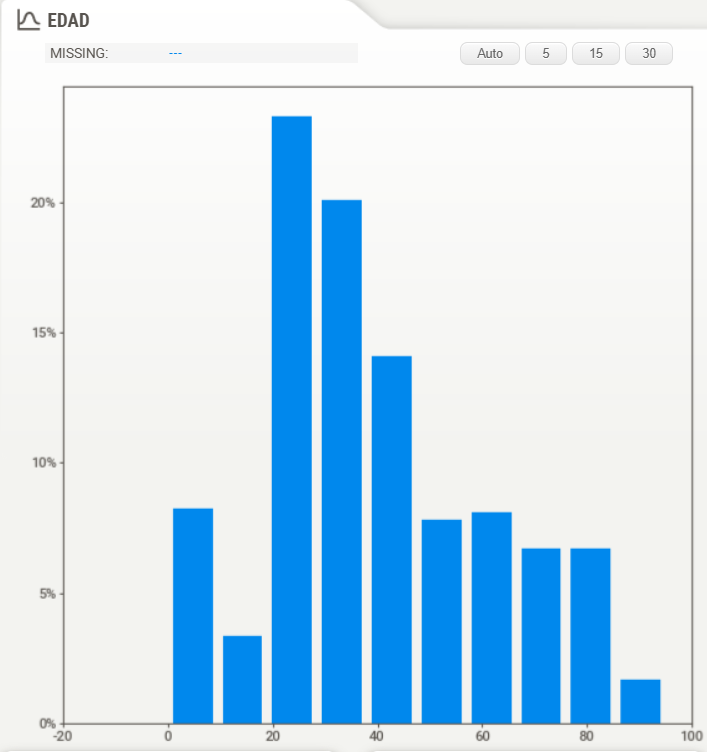

In [29]:
# Mostrar una imagen local
display(Image(filename='img/age.png'))

Distribución por día, muestra que los días cercanos a las quincenas son los días con mayor número de accidentes, esto puede ser por que los días de quincena la gente transita más para hacer retiros de dinero o gastos en general

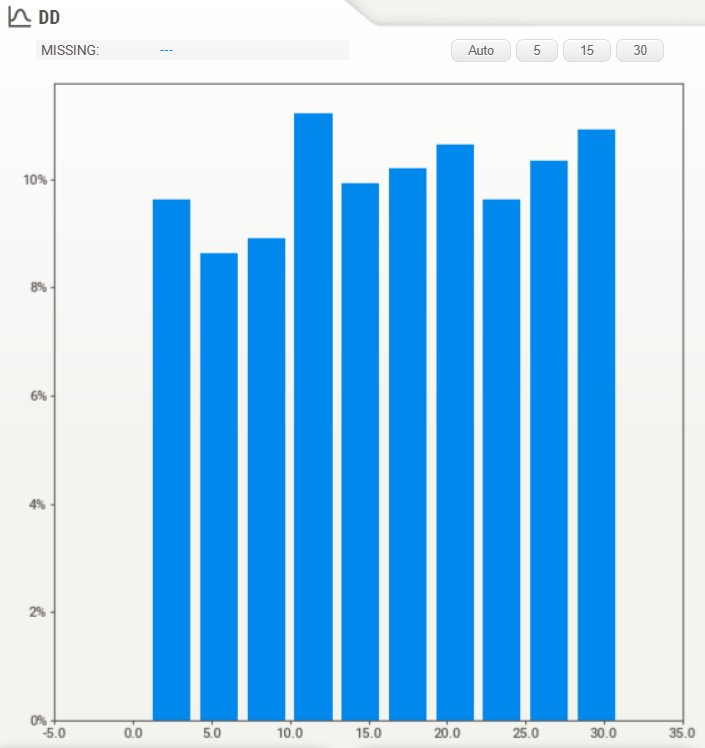

In [30]:
# Mostrar una imagen local
display(Image(filename='img/day.png'))

La distribución por mes muestra que al inicio y cierre de año el número de accidentes tiende a subir, esto puede ser por las festividades de las fechas en las que se viaja mucho y a parte puede haber un incremento en conductores alcoholizaods.

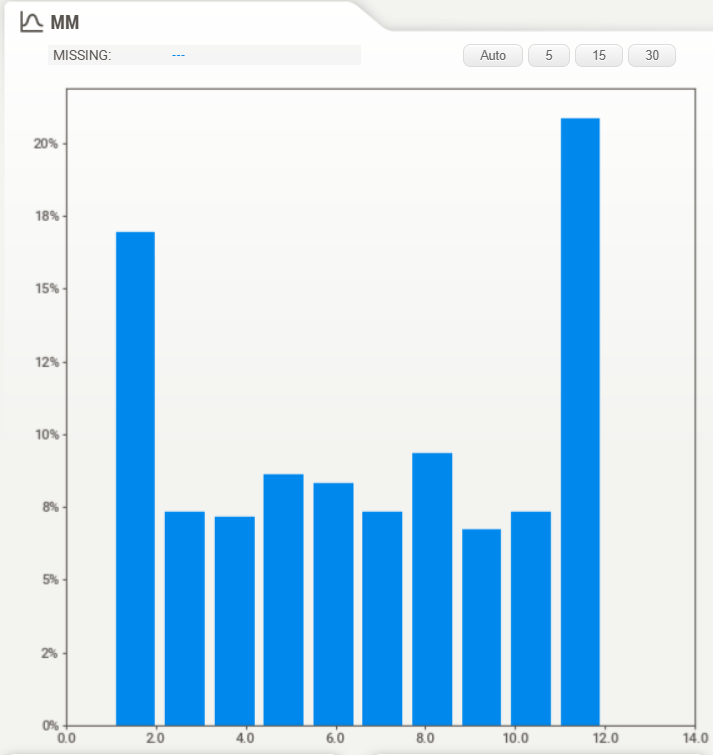

In [31]:
# Mostrar una imagen local
display(Image(filename='img/month.png'))

In [13]:
# Estadísticas Descriptivas
print(dataHechos.describe())
#print(dataHechos.describe(include=['O']))


       N_VICTIMAS                          FECHA         AAAA          MM  \
count  696.000000                            696   696.000000  696.000000   
mean     1.030172  2018-09-14 05:12:24.827586048  2018.188218    6.692529   
min      1.000000            2016-01-01 00:00:00  2016.000000    1.000000   
25%      1.000000            2017-04-02 12:00:00  2017.000000    4.000000   
50%      1.000000            2018-07-12 12:00:00  2018.000000    7.000000   
75%      1.000000            2020-01-04 06:00:00  2020.000000   10.000000   
max      3.000000            2021-12-30 00:00:00  2021.000000   12.000000   
std      0.179393                            NaN     1.683754    3.571309   

               DD                           HORA        Altura      COMUNA  
count  696.000000                            696    129.000000  696.000000  
mean    15.936782  2023-11-15 05:27:59.396551936   3336.635659    7.425287  
min      1.000000            1900-01-02 00:00:00     30.000000    0.000000 

In [14]:
print(dataVictimas.describe())
#print(dataVictimas.describe(include=['O']))

                               FECHA         AAAA          MM          DD  \
count                            717   717.000000  717.000000  717.000000   
mean   2018-09-09 01:36:24.100418304  2018.174338    6.688982   15.960948   
min              2016-01-01 00:00:00  2016.000000    1.000000    1.000000   
25%              2017-04-01 00:00:00  2017.000000    4.000000    9.000000   
50%              2018-07-07 00:00:00  2018.000000    7.000000   16.000000   
75%              2019-12-18 00:00:00  2019.000000   10.000000   23.000000   
max              2021-12-30 00:00:00  2021.000000   12.000000   31.000000   
std                              NaN     1.672655    3.575140    8.683358   

             EDAD  
count  717.000000  
mean    39.050209  
min      0.000000  
25%     24.000000  
50%     35.000000  
75%     55.000000  
max     95.000000  
std     22.010669  


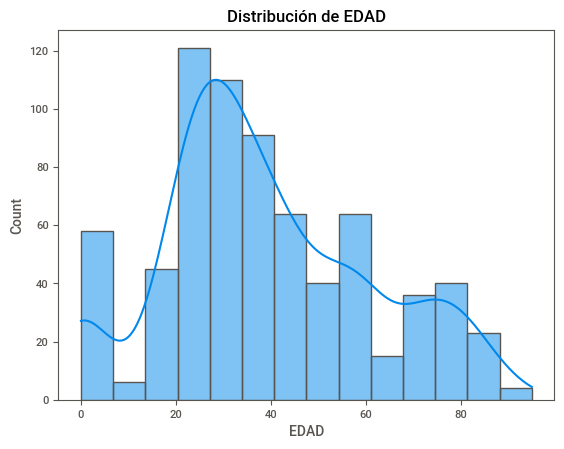

In [15]:
# Visualización con Matplotlib y Seaborn
# Histograma de la columna 'EDAD'
sns.histplot(dataVictimas['EDAD'], kde=True)
plt.title('Distribución de EDAD')
plt.show()



Pareciera que el sexo femenino tiene una mayor variabilidad en cuanto a la edad en la que sufre incidentes

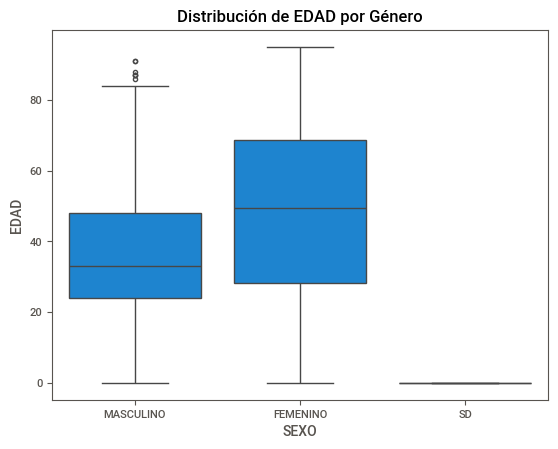

In [16]:
# Boxplot de 'EDAD' por otra variable categórica (por ejemplo, 'Género' si existe)

sns.boxplot(x='SEXO', y='EDAD', data=dataVictimas)
plt.title('Distribución de EDAD por Género')
plt.show()

Las dos variables con mayor correlación son la comuna y la altura.Pareciera que a mayor altura en la comuna hay un mayor numero de incidentes

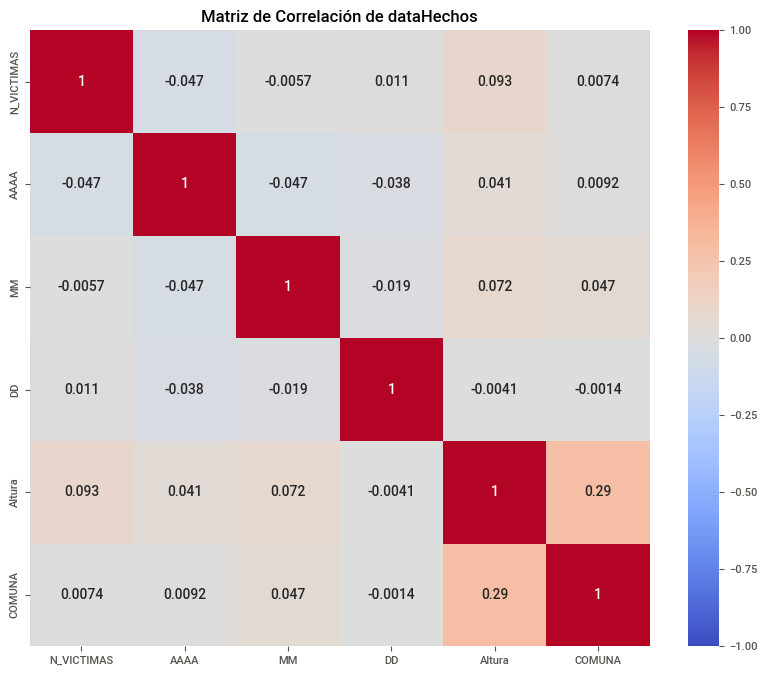

In [17]:
# Selecciona solo las columnas numéricas
dataHechos_numerico = dataHechos.select_dtypes(include=[np.number])

# Calcula y visualiza la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(dataHechos_numerico.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación de dataHechos')
plt.show()

Se buscaron datos atípicos en la edad pero no se encontró nada.

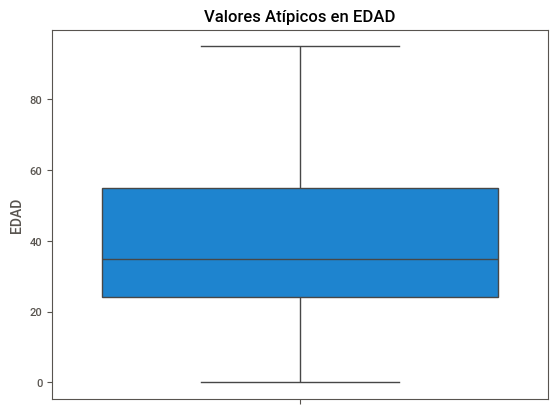

In [18]:
# Detección de Valores Atípicos
sns.boxplot(dataVictimas['EDAD'])
plt.title('Valores Atípicos en EDAD')
plt.show()

Los valores faltantes principalmente se encuentras en los campos Altura Cruce

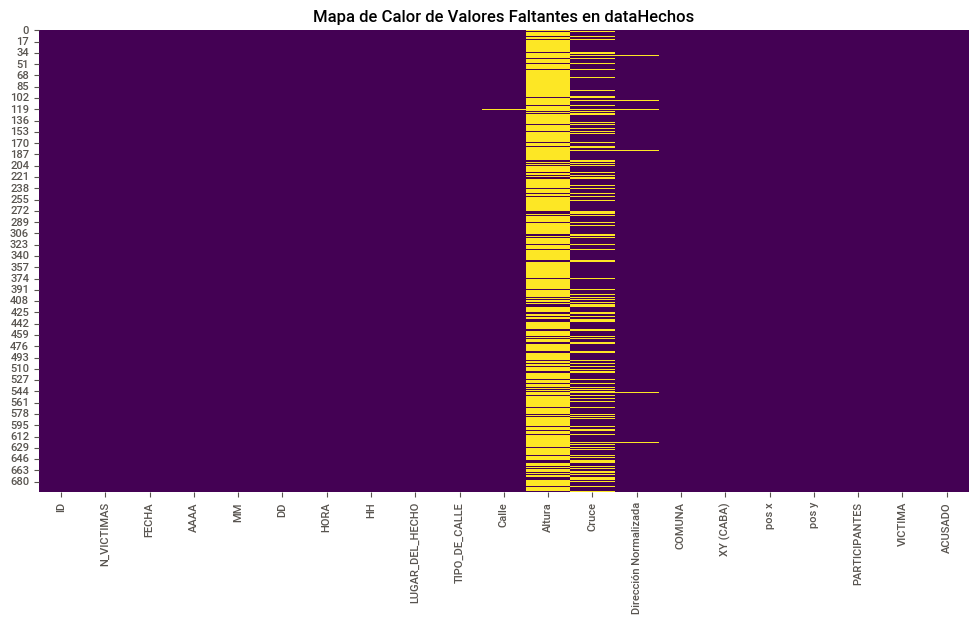

In [19]:
# Análisis de Valores Faltantes
# Mapa de calor de valores faltantes
plt.figure(figsize=(12, 6))
sns.heatmap(dataHechos.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Calor de Valores Faltantes en dataHechos')
plt.show()

In [20]:
# Porcentaje de valores faltantes por columna
missing_data = dataHechos.isnull().mean() * 100
print(missing_data)

ID                        0.000000
N_VICTIMAS                0.000000
FECHA                     0.000000
AAAA                      0.000000
MM                        0.000000
DD                        0.000000
HORA                      0.000000
HH                        0.000000
LUGAR_DEL_HECHO           0.000000
TIPO_DE_CALLE             0.000000
Calle                     0.143678
Altura                   81.465517
Cruce                    24.568966
Dirección Normalizada     1.149425
COMUNA                    0.000000
XY (CABA)                 0.000000
pos x                     0.000000
pos y                     0.000000
PARTICIPANTES             0.000000
VICTIMA                   0.000000
ACUSADO                   0.000000
dtype: float64


In [21]:
# Perfilado de Datos con YData Profiling
# Reiniciar el índice
dataHechos = dataHechos.reset_index(drop=True)

profile_hechos = ydata_profiling.ProfileReport(dataHechos, title="Reporte de Hechos")
profile_hechos.to_file("report_hechos_ydata.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [22]:
profile_victimas = ydata_profiling.ProfileReport(dataVictimas, title="Reporte de Víctimas")
profile_victimas.to_file("report_victimas_ydata.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [23]:
# Análisis de Series Temporales (si aplica)
# Convertir 'HORA' a índice de fecha y hora si no está ya en ese formato
dataHechos.set_index('HORA', inplace=True)

# Resample para obtener datos por día, semana, etc.
data_diaria = dataHechos.resample('D').count()
data_semanal = dataHechos.resample('W').count()

In [24]:
dataHechos.drop_duplicates(inplace=True)
# Eliminar columnas con más del 80% de valores faltantes
umbral_nulos = 0.8
porcentaje_nulos = dataHechos.isnull().mean()
columnas_a_eliminar = porcentaje_nulos[porcentaje_nulos > umbral_nulos].index
dataHechos.drop(columns=columnas_a_eliminar, inplace=True)


In [25]:
print(dataHechos.columns)


Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO'],
      dtype='object')


In [26]:
dataVictimas.to_excel('victimas.xlsx')
dataHechos.to_excel('hechos.xlsx')